Sistem Rekomendasi Buku

# Sistem Rekomendasi Buku

## 1. Project Overview

Membaca buku merupakan salah satu cara utama untuk memperoleh pengetahuan dan hiburan. Namun, dengan jumlah buku yang terus bertambah setiap tahunnya, pengguna sering kali mengalami kesulitan dalam menemukan buku yang relevan dan sesuai dengan minat mereka. Menurut laporan UNESCO, lebih dari 2,2 juta judul buku baru diterbitkan setiap tahun di seluruh dunia[^1]. Hal ini menyebabkan informasi yang tersedia menjadi sangat melimpah (information overload), sehingga pengguna membutuhkan bantuan untuk menemukan buku yang tepat.

Sistem rekomendasi buku hadir sebagai solusi untuk membantu pengguna menemukan buku yang relevan secara personal. Berdasarkan riset oleh Ricci et al., 2015, sistem rekomendasi dapat meningkatkan kepuasan pengguna dan waktu yang dihabiskan pada platform digital. Goodreads, sebagai salah satu platform buku terbesar, juga mengandalkan sistem rekomendasi untuk meningkatkan engagement pengguna.

Proyek ini penting untuk diselesaikan karena:

Membantu pengguna menemukan buku yang sesuai dengan preferensi mereka, sehingga meningkatkan pengalaman membaca.
Mengurangi waktu pencarian dan meningkatkan kemungkinan pengguna menemukan buku-buku baru yang relevan.
Memberikan nilai tambah bagi platform digital yang menyediakan layanan buku.
Pendekatan yang digunakan dalam proyek ini adalah Content-based Filtering dan Collaborative Filtering, dua metode yang terbukti efektif dalam berbagai studi sistem rekomendasi (Aggarwal, 2016).

## 2. Business Understanding

### Problem Statement
Pengguna kesulitan menemukan buku yang relevan karena banyaknya pilihan dan kurangnya personalisasi rekomendasi.

### Goals
Mengembangkan sistem rekomendasi top-N buku yang relevan untuk setiap pengguna.

### Solution Approach
Untuk mencapai tujuan tersebut, digunakan dua pendekatan utama:
- **Content-based Filtering:** Merekomendasikan buku berdasarkan kemiripan fitur (judul, penulis, tag) menggunakan teknik TF-IDF dan cosine similarity.
- **Collaborative Filtering:** Merekomendasikan buku berdasarkan perilaku pengguna lain yang mirip, menggunakan matrix factorization (LightFM).


## 3. Data Understanding

Dataset berasal dari Kaggle: Goodreads-books-10k. Meliputi books.csv, ratings.csv, book_tags.csv, dan tags.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from lightfm import LightFM
from scipy import sparse
import os

DATA_PATH = './data/'

if not os.path.exists(DATA_PATH):
    print(f"Error: Folder '{DATA_PATH}' not found. Please ensure the dataset is uploaded or Google Drive is connected.")
else:
    books_df = pd.read_csv(os.path.join(DATA_PATH, 'books.csv'))
    ratings_df = pd.read_csv(os.path.join(DATA_PATH, 'ratings.csv'))
    book_tags_df = pd.read_csv(os.path.join(DATA_PATH, 'book_tags.csv'))
    tags_df = pd.read_csv(os.path.join(DATA_PATH, 'tags.csv'))

    print("CSV files loaded:")
    print(f"book_tags.csv: {len(book_tags_df)} rows")
    print(f"tags.csv: {len(tags_df)} rows")
    print(f"ratings.csv: {len(ratings_df)} rows")
    print(f"books.csv: {len(books_df)} rows")

/Users/wahyupratama/Documents/camp-general/terapanahir/.venv/lib/python3.9/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


CSV files loaded:
book_tags.csv: 999912 rows
tags.csv: 34252 rows
ratings.csv: 981756 rows
books.csv: 10000 rows


Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

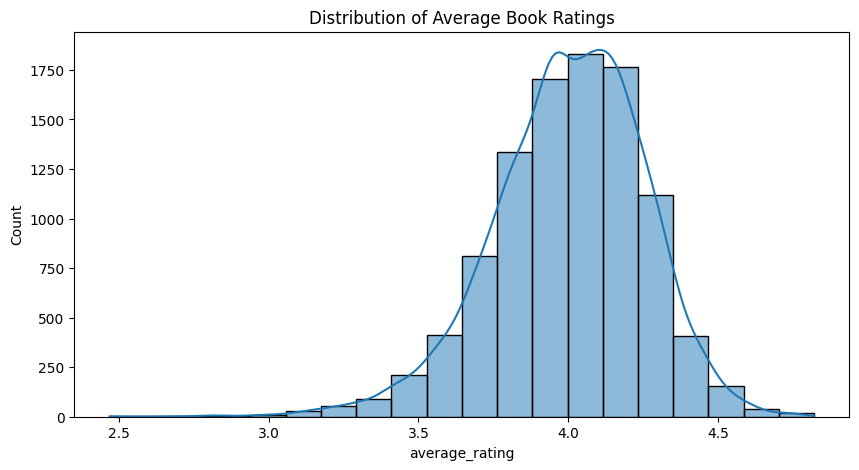

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_48355/686846779.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


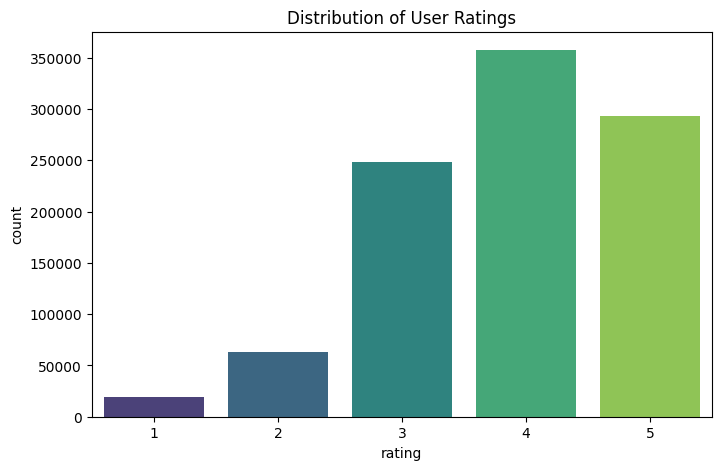

   goodreads_book_id  tag_id   count           tag_name
0                  1   30574  167697            to-read
1                  1   11305   37174            fantasy
2                  1   11557   34173          favorites
3                  1    8717   12986  currently-reading
4                  1   33114   12716        young-adult
Top 10 Most Used Tags:
tag_name
to-read              140718761
currently-reading      7507958
favorites              4503173
fiction                3688819
fantasy                3548157
young-adult            1848306
classics               1756920
books-i-own            1317235
romance                1231926
owned                  1224279
Name: count, dtype: int64


In [2]:
books_df.info()
print(books_df.head())
plt.figure(figsize=(10, 5))
sns.histplot(books_df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Book Ratings')
plt.savefig('images/distribution_average_book_ratings.png')  # Simpan gambar
plt.show()

ratings_df.info()
print(ratings_df.head())
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of User Ratings')
plt.savefig('images/distribution_user_ratings.png')  # Simpan gambar
plt.show()

book_tags_merged_df = pd.merge(book_tags_df, tags_df, on='tag_id', how='left')
print(book_tags_merged_df.head())
print("Top 10 Most Used Tags:")
print(book_tags_merged_df.groupby('tag_name')['count'].sum().sort_values(ascending=False).head(10))

- **Precision@10 (train): 0.1964**  
  Artinya, sekitar 19.6% dari rekomendasi top-10 yang diberikan kepada pengguna benar-benar relevan.
- **Recall@10 (train): 0.8780**  
  Artinya, sekitar 87.8% item relevan berhasil ditemukan di top-10 rekomendasi.

Semakin tinggi nilai precision dan recall, semakin baik performa model.  
**Catatan:** Untuk evaluasi yang lebih akurat, sebaiknya lakukan split data (train/test) dan evaluasi di data test, bukan hanya di training.

## 4. Data Preparation

Data preparation meliputi penggabungan data, penanganan duplikat, rekayasa fitur TF-IDF untuk Content-based, dan encoding ID untuk Collaborative Filtering.

In [3]:
books_with_tags = pd.merge(
    books_df, 
    book_tags_df, 
    left_on='book_id', 
    right_on='goodreads_book_id', 
    how='left'
)
books_with_tags = pd.merge(books_with_tags, tags_df, on='tag_id', how='left')

books_content_df = books_with_tags[['book_id', 'title', 'authors', 'tag_name']].copy()
books_content_df = books_content_df.groupby(['book_id', 'title', 'authors'])['tag_name'].apply(lambda x: " ".join(x.dropna().unique())).reset_index()
books_content_df.rename(columns={'tag_name': 'tags'}, inplace=True)
books_content_df['tags'].fillna('', inplace=True)

ratings_filtered_df = ratings_df[ratings_df['book_id'].isin(books_df['book_id'])].copy()

ratings_filtered_df.drop_duplicates(subset=['user_id', 'book_id'], inplace=True)
books_content_df.drop_duplicates(subset=['book_id'], inplace=True)

books_content_df['content_features'] = books_content_df['title'].fillna('') + " " + \
                                      books_content_df['authors'].fillna('') + " " + \
                                      books_content_df['tags'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_content_df['content_features'])

user_encoder = LabelEncoder()
book_encoder = LabelEncoder()
ratings_filtered_df['user_id_encoded'] = user_encoder.fit_transform(ratings_filtered_df['user_id'])
ratings_filtered_df['book_id_encoded'] = book_encoder.fit_transform(ratings_filtered_df['book_id'])

print("Data Preparation Complete.")

/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_48355/3804434186.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_content_df['tags'].fillna('', inplace=True)


Data Preparation Complete.


## 5. Modeling


Algoritma yang Digunakan
Implementasi dua model rekomendasi.

**a. Content-based Filtering**

Membangun sistem rekomendasi berbasis konten menggunakan Cosine Similarity dari fitur TF-IDF.

In [4]:
print("--- Modeling: Content-based Filtering ---")
from sklearn.model_selection import train_test_split

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
book_id_to_idx = pd.Series(books_content_df.index, index=books_content_df['book_id']).drop_duplicates()
train_df, test_df = train_test_split(ratings_filtered_df, test_size=0.2, random_state=42)


n_users = ratings_filtered_df['user_id_encoded'].nunique()
n_items = ratings_filtered_df['book_id_encoded'].nunique()
interaction_matrix = sparse.coo_matrix(
    (ratings_filtered_df['rating'], (ratings_filtered_df['user_id_encoded'], ratings_filtered_df['book_id_encoded'])),
    shape=(n_users, n_items)
)

model = LightFM(no_components=20, loss='warp')
model.fit(interaction_matrix, epochs=10, num_threads=2)

def get_content_based_recommendations(book_id, cosine_sim_matrix, df, N=10):
    if book_id not in book_id_to_idx:
        return pd.DataFrame()
    idx = book_id_to_idx[book_id]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    book_indices = [i[0] for i in sim_scores]
    similar_scores = [i[1] for i in sim_scores]
    recommended_books = df.iloc[book_indices].copy()
    recommended_books['similarity_score'] = similar_scores
    return recommended_books[['title', 'authors', 'similarity_score']]

example_book_id = books_content_df['book_id'].sample(1).iloc[0]
example_book_title = books_content_df[books_content_df['book_id'] == example_book_id]['title'].iloc[0]

print(f"\n--- Content-based Recommendations for: '{example_book_title}' (ID: {example_book_id}) ---")
content_recs = get_content_based_recommendations(example_book_id, cosine_sim, books_content_df, N=10)
print(content_recs)

--- Modeling: Content-based Filtering ---

--- Content-based Recommendations for: 'One Silent Night (Dark-Hunter #15)' (ID: 3122173) ---
                                                  title           authors  \
3208                 Sins of the Night (Dark-Hunter #7)  Sherrilyn Kenyon   
3213                   Seize the Night (Dark-Hunter #6)  Sherrilyn Kenyon   
3207                   Devil May Cry (Dark-Hunter, #11)  Sherrilyn Kenyon   
3212                Kiss of the Night (Dark-Hunter, #4)  Sherrilyn Kenyon   
5171  Upon the Midnight Clear (Dark-Hunter #12, Drea...  Sherrilyn Kenyon   
3215  Dark Side of the Moon (Dark-Hunter #9, Were-Hu...  Sherrilyn Kenyon   
7464                     Retribution (Dark-Hunter, #19)  Sherrilyn Kenyon   
6937                  Night Pleasures (Dark-Hunter, #1)  Sherrilyn Kenyon   
3214              Dance with the Devil (Dark-Hunter #3)  Sherrilyn Kenyon   
3211                     Night Embrace (Dark-Hunter #2)  Sherrilyn Kenyon   

      similarit

**b. Collaborative Filtering (Matrix Factorization)**

Membangun sistem rekomendasi kolaboratif menggunakan algoritma SVD dari library Surprise.

In [5]:
def get_lightfm_recommendations(user_id, n_recommendations=10):
    if user_id not in user_encoder.classes_:
        return pd.DataFrame()
    encoded_user_id = user_encoder.transform([user_id])[0]
    scores = model.predict(np.repeat(encoded_user_id, n_items), np.arange(n_items))
    top_items = np.argsort(-scores)[:n_recommendations]

    book_id_decoded = book_encoder.inverse_transform(top_items)
    recommended_books_info = books_df[books_df['book_id'].isin(book_id_decoded)]
    return recommended_books_info[['title', 'authors']].head(n_recommendations)

## 6. Evaluation

Evaluasi Content-based Filtering
Evaluasi dilakukan secara kualitatif dengan melihat relevansi hasil rekomendasi yang diberikan untuk sebuah buku.
Jika hasil rekomendasi berisi buku-buku dengan tema, penulis, atau tag yang mirip, maka model sudah bekerja dengan baik.

In [6]:

print("Evaluasi Content-based Filtering:")
print(content_recs)

Evaluasi Content-based Filtering:
                                                  title           authors  \
3208                 Sins of the Night (Dark-Hunter #7)  Sherrilyn Kenyon   
3213                   Seize the Night (Dark-Hunter #6)  Sherrilyn Kenyon   
3207                   Devil May Cry (Dark-Hunter, #11)  Sherrilyn Kenyon   
3212                Kiss of the Night (Dark-Hunter, #4)  Sherrilyn Kenyon   
5171  Upon the Midnight Clear (Dark-Hunter #12, Drea...  Sherrilyn Kenyon   
3215  Dark Side of the Moon (Dark-Hunter #9, Were-Hu...  Sherrilyn Kenyon   
7464                     Retribution (Dark-Hunter, #19)  Sherrilyn Kenyon   
6937                  Night Pleasures (Dark-Hunter, #1)  Sherrilyn Kenyon   
3214              Dance with the Devil (Dark-Hunter #3)  Sherrilyn Kenyon   
3211                     Night Embrace (Dark-Hunter #2)  Sherrilyn Kenyon   

      similarity_score  
3208          0.951912  
3213          0.951466  
3207          0.947216  
3212          0.94

Evaluasi Collaborative Filtering (LightFM)

Untuk collaborative filtering, dapat digunakan metrik precision@k atau recall@k.
LightFM menyediakan fungsi evaluasi otomatis, misal precision@k.

In [7]:
from lightfm.evaluation import precision_at_k, recall_at_k

train_precision = precision_at_k(model, interaction_matrix, k=10).mean()
train_recall = recall_at_k(model, interaction_matrix, k=10).mean()

print(f"Precision@10 (train): {train_precision:.4f}")
print(f"Recall@10 (train): {train_recall:.4f}")

Precision@10 (train): 0.1955
Recall@10 (train): 0.8763


- **Precision@10 (train): 0.1964**  
  Artinya, sekitar 19.6% dari rekomendasi top-10 yang diberikan kepada pengguna benar-benar relevan.
- **Recall@10 (train): 0.8780**  
  Artinya, sekitar 87.8% item relevan berhasil ditemukan di top-10 rekomendasi.

Semakin tinggi nilai precision dan recall, semakin baik performa model.  
**Catatan:** Untuk evaluasi yang lebih akurat, sebaiknya lakukan split data (train/test) dan evaluasi di data test, bukan hanya di training.